## Setup

Load libraries

In [2]:
import pickle
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from utils.model_utils import split_data

## Load Data

We'll load data and check the properties.

In [3]:
data = pd.read_parquet('../data/clean_data.parquet.gzip')

data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6675745 entries, 0 to 6675744
Data columns (total 12 columns):
 #   Column           Dtype  
---  ------           -----  
 0   idx              int64  
 1   northing         float64
 2   easting          float64
 3   amplitude        float64
 4   unwrapped_phase  float64
 5   coherence        float64
 6   incidence_angle  float64
 7   bare_earth_dem   float32
 8   vegetation_ht    float32
 9   wrapped_phase    float64
 10  snow_depth       float32
 11  elevation        float64
dtypes: float32(3), float64(8), int64(1)
memory usage: 534.8 MB


,idx,northing,easting,amplitude,unwrapped_phase,coherence,incidence_angle,bare_earth_dem,vegetation_ht,wrapped_phase,snow_depth,elevation
0,406,4.322002e+06,221217.233272,0.261970,-10.066239,0.478974,0.782536,2723.885986,1.194092,2.104467,0.370529,2724.164062
1,407,4.322002e+06,221220.233513,0.261970,-10.170159,0.528913,0.782536,2723.309082,1.335449,1.921621,0.652512,2724.658569
2,408,4.322002e+06,221223.233754,0.272913,-10.170159,0.572173,0.779307,2722.560059,2.762695,2.226624,0.652512,2725.022705
3,409,4.322002e+06,221226.233995,0.272913,-10.170159,0.572173,0.779307,2722.343018,3.000488,2.226624,0.594406,2725.022705
4,410,4.322002e+06,221229.234236,0.272913,-10.013985,0.633912,0.779307,2722.259033,2.894531,1.921621,0.626389,2725.066040


## Data Splitting

* Train: 80%
* Tune: 10%
* Test: 10%

In [4]:
# First, we will divide the data into two sets: one with vegation and one without vegation

vegetation_df = data[data.vegetation_ht >= 0.5]
no_vegetation_df = data[data.vegetation_ht < 0.5].drop('vegetation_ht', axis=1)

In [5]:
full_splits = split_data(data)
vegetation_splits = split_data(vegetation_df) 
no_vegetation_splits = split_data(no_vegetation_df)

## Data Exploration

* Descriptive Statistics

In [6]:
mappings=dict(zip(['full', 'vegetation', 'no_vegetation'],  [full_splits, vegetation_splits, no_vegetation_splits]))

In [7]:
for key, value in mappings.items():
    print(f"{key} data set:")
    print("---------------")
    print(f"X shape (train): {value['X_train'].shape}")
    print(f"y shape (train): {value['y_train'].shape}")
    print(f"X shape (test): {value['X_test'].shape}")
    print(f"y shape (test): {value['y_test'].shape}")
    print('')

full data set:
---------------
X shape (train): (5340595, 11)
y shape (train): (5340595,)
X shape (test): (667575, 11)
y shape (test): (667575,)

vegetation data set:
---------------
X shape (train): (2166210, 11)
y shape (train): (2166210,)
X shape (test): (270777, 11)
y shape (test): (270777,)

no_vegetation data set:
---------------
X shape (train): (3174384, 10)
y shape (train): (3174384,)
X shape (test): (396799, 10)
y shape (test): (396799,)



In [8]:
for key, value in mappings.items():
    print("===========================================")
    print(f'{key} data set descriptive statistics:')
    print("===========================================")
    data_=value['X_train'].drop(columns=['idx', 'northing', 'easting']).assign(snow_depth=value['y_train'])
    display(data_.describe().T)
    print('')

full data set descriptive statistics:


,count,mean,std,min,25%,50%,75%,max
amplitude,5340595.0,0.231225,0.181522,0.014839,0.098118,0.147686,0.328360,6.111136
unwrapped_phase,5340595.0,-8.247080,0.907039,-15.263859,-8.757673,-8.279767,-7.684556,-0.059455
coherence,5340595.0,0.571191,0.162054,0.002759,0.459372,0.593741,0.695853,0.979328
incidence_angle,5340595.0,0.869164,0.179392,0.138086,0.773516,0.903627,0.988143,1.951571
bare_earth_dem,5340595.0,3009.173340,116.112885,2490.905029,3007.211914,3031.912109,3076.554932,3157.448975
vegetation_ht,5340595.0,3.465978,5.295716,0.000000,0.000000,0.181641,6.352539,34.620117
wrapped_phase,5340595.0,-1.240758,1.301604,-3.141549,-2.137795,-1.593572,-0.754663,3.141589
elevation,5340595.0,3016.552508,114.265313,2500.195190,3012.509277,3036.439941,3084.151489,3168.000000
snow_depth,5340595.0,1.079451,0.293091,0.000168,0.901535,1.089035,1.260666,2.999436



vegetation data set descriptive statistics:


,count,mean,std,min,25%,50%,75%,max
amplitude,2166210.0,0.389612,0.178981,0.014839,0.275728,0.352246,0.462903,6.111136
unwrapped_phase,2166210.0,-8.726819,0.813558,-15.263859,-9.172668,-8.667634,-8.228442,-0.470978
coherence,2166210.0,0.476164,0.154118,0.005907,0.364584,0.474051,0.586418,0.967077
incidence_angle,2166210.0,0.792071,0.215441,0.136859,0.647743,0.818044,0.943238,1.951571
bare_earth_dem,2166210.0,2957.811035,154.606201,2490.961914,2869.948242,3004.125000,3076.608887,3157.378906
vegetation_ht,2166210.0,8.432384,5.255324,0.500000,4.093506,8.123779,12.058838,34.620117
wrapped_phase,2166210.0,-1.031619,1.662865,-3.141509,-2.255836,-1.687721,-0.088993,3.141589
elevation,2166210.0,2969.700160,153.618345,2500.195190,2883.210083,3016.082458,3088.027344,3168.000000
snow_depth,2166210.0,1.105371,0.276748,0.000412,0.951584,1.110520,1.257492,2.999436



no_vegetation data set descriptive statistics:


,count,mean,std,min,25%,50%,75%,max
amplitude,3174384.0,0.123143,0.069612,0.015984,0.086039,0.105529,0.134055,3.549916
unwrapped_phase,3174384.0,-7.919697,0.817252,-15.219127,-8.442007,-8.012123,-7.328834,-0.059455
coherence,3174384.0,0.636133,0.132678,0.002759,0.563081,0.655774,0.730447,0.979328
incidence_angle,3174384.0,0.921856,0.125117,0.283877,0.839795,0.940427,1.003706,1.945104
bare_earth_dem,3174384.0,3044.275635,57.607327,2492.033936,3019.758057,3035.701904,3076.509033,3157.448975
wrapped_phase,3174384.0,-1.383643,0.955137,-3.141549,-2.059138,-1.542846,-0.872100,3.141422
elevation,3174384.0,3048.575670,57.614730,2501.129150,3023.218628,3039.777588,3081.683960,3168.000000
snow_depth,3174384.0,1.061782,0.302469,0.000168,0.870285,1.067795,1.263108,2.999436


* Plotting correlation matrix

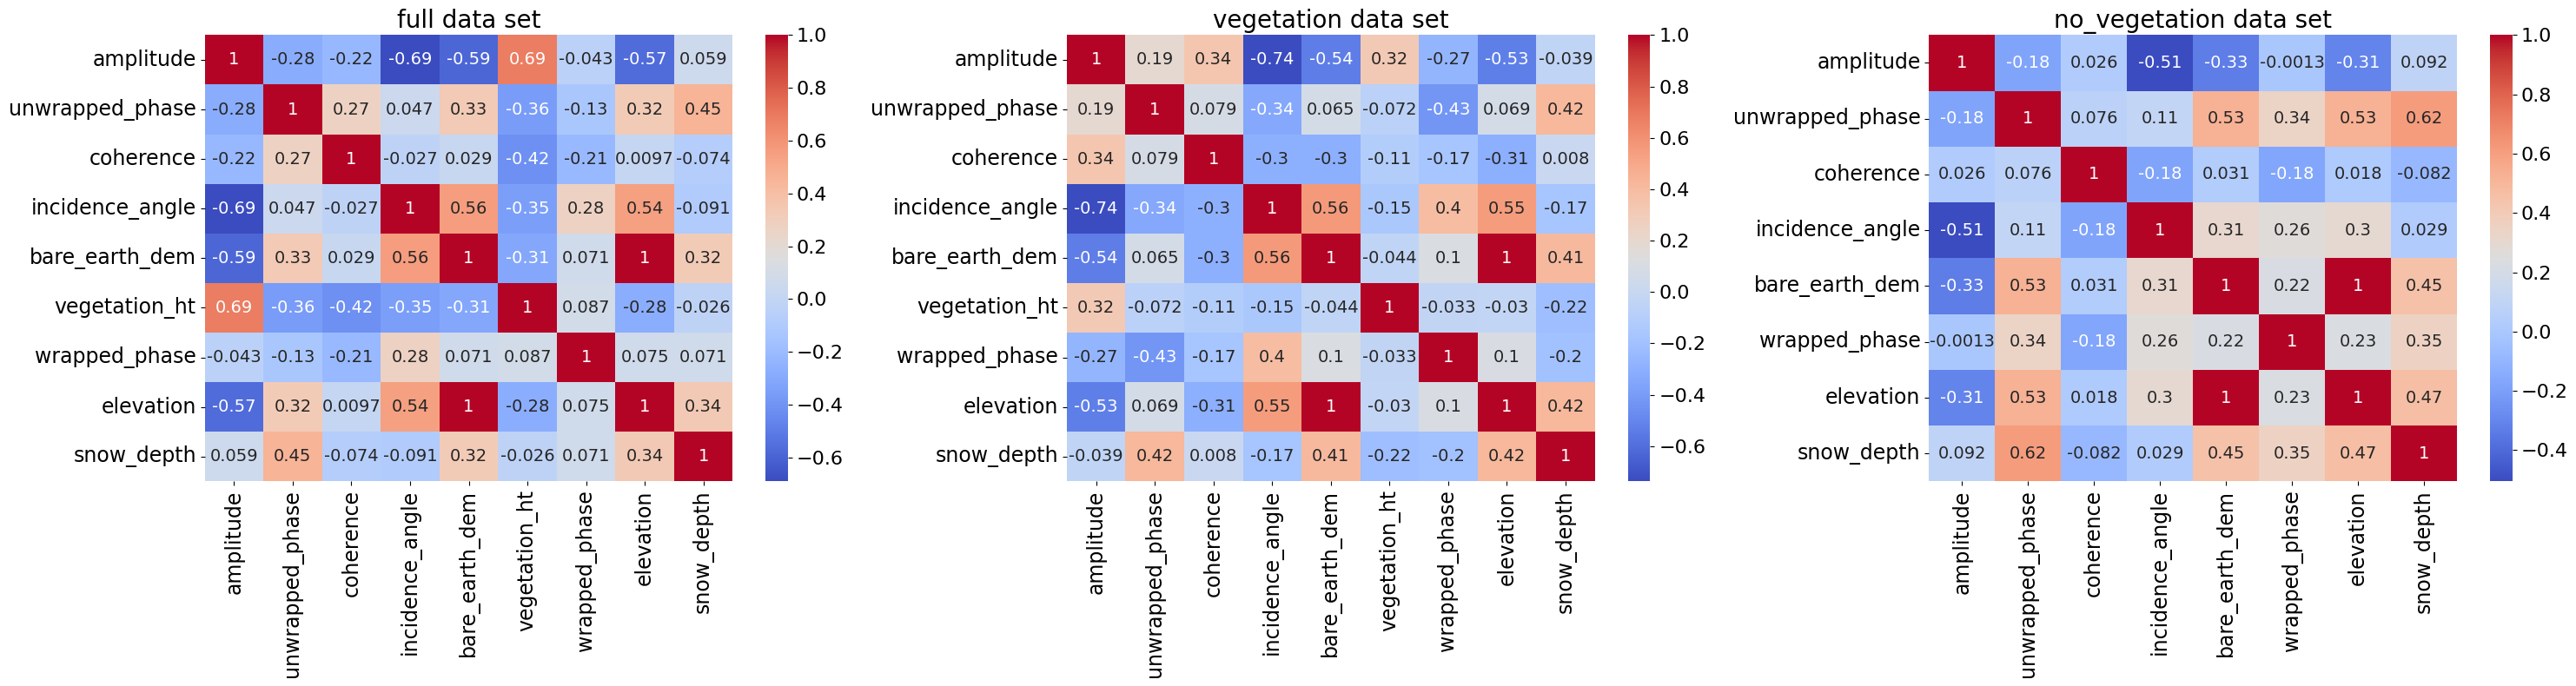

In [9]:
plt.figure(figsize=(30, 8))

for i, (key, value) in enumerate(mappings.items()):
    plt.subplot(1, 3, i+1)
    ax=sns.heatmap(
        (
            value['X_train'].
            drop(columns=['idx', 'northing', 'easting']).
            assign(snow_depth=value['y_train']).corr()
        ),
        cmap='coolwarm', 
        annot=True,
        #fmt='.2f',
        annot_kws={'fontsize': 14}
    )
    plt.title(f'{key} data set', fontsize=20)
    ax.tick_params(axis='x', labelsize=17)
    ax.tick_params(axis='y', labelsize=17) 
    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(labelsize=16)
plt.tight_layout()

plt.savefig('../plots/correlation_matrix.png', dpi=300)

* Plotting the distribution of all variables

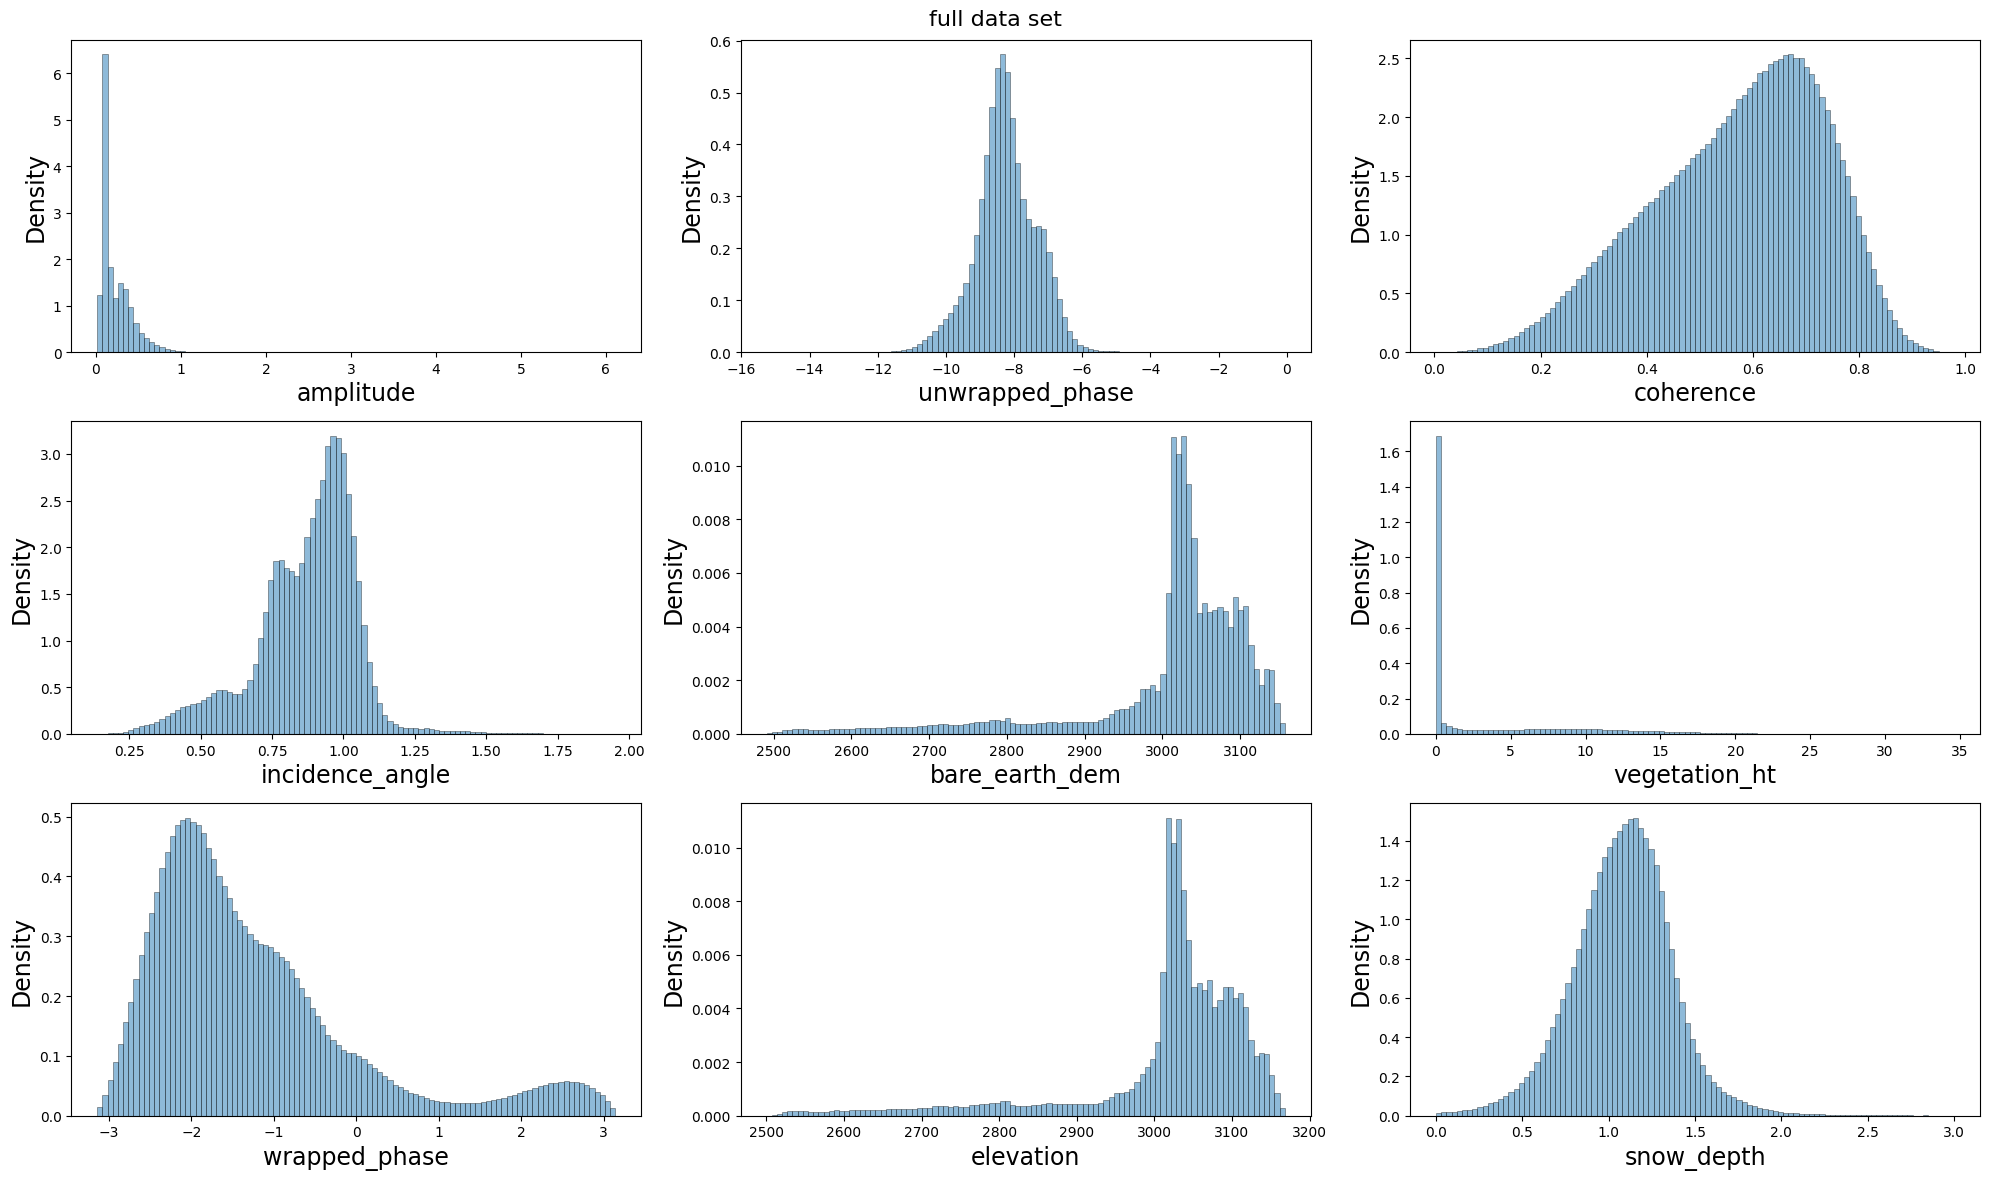

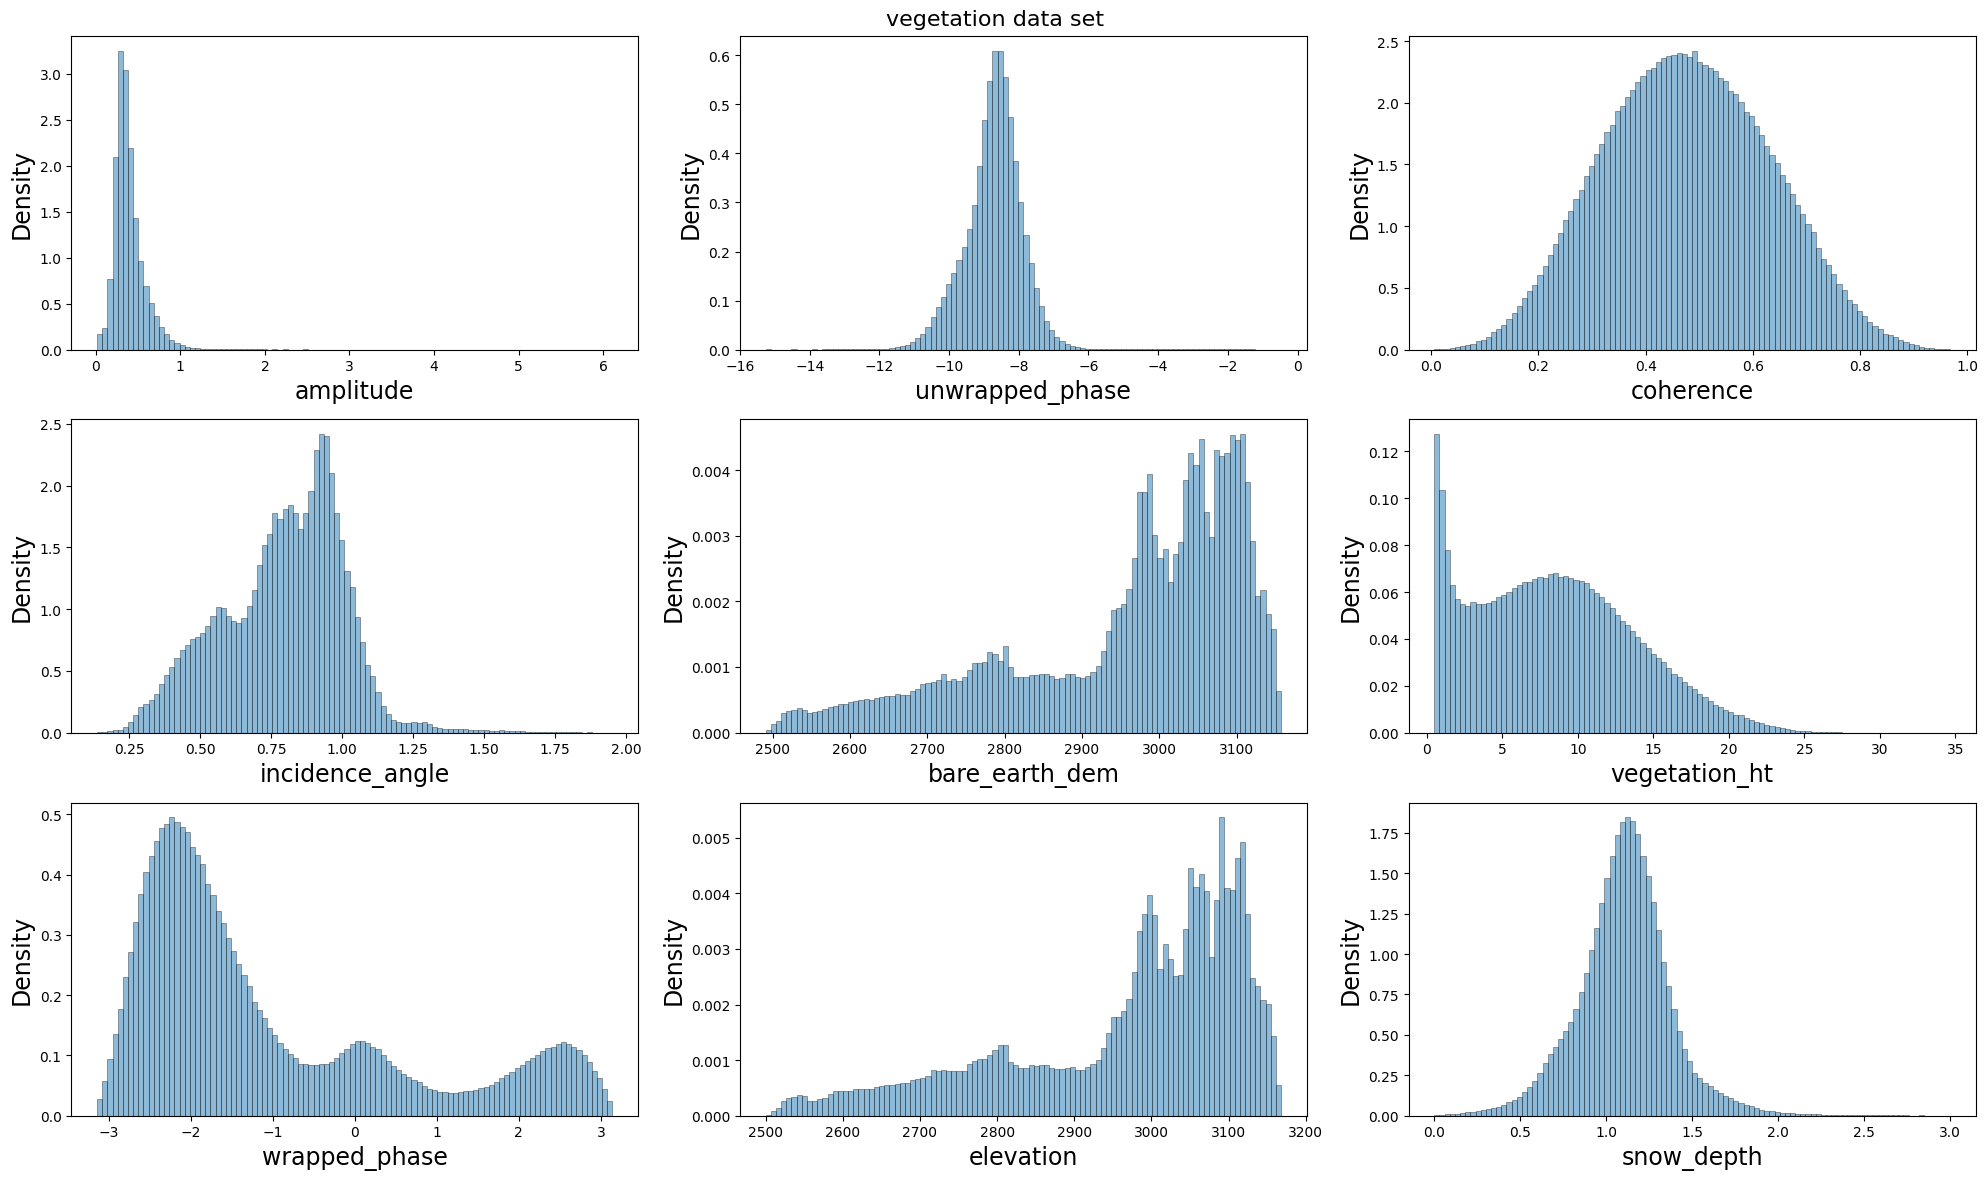

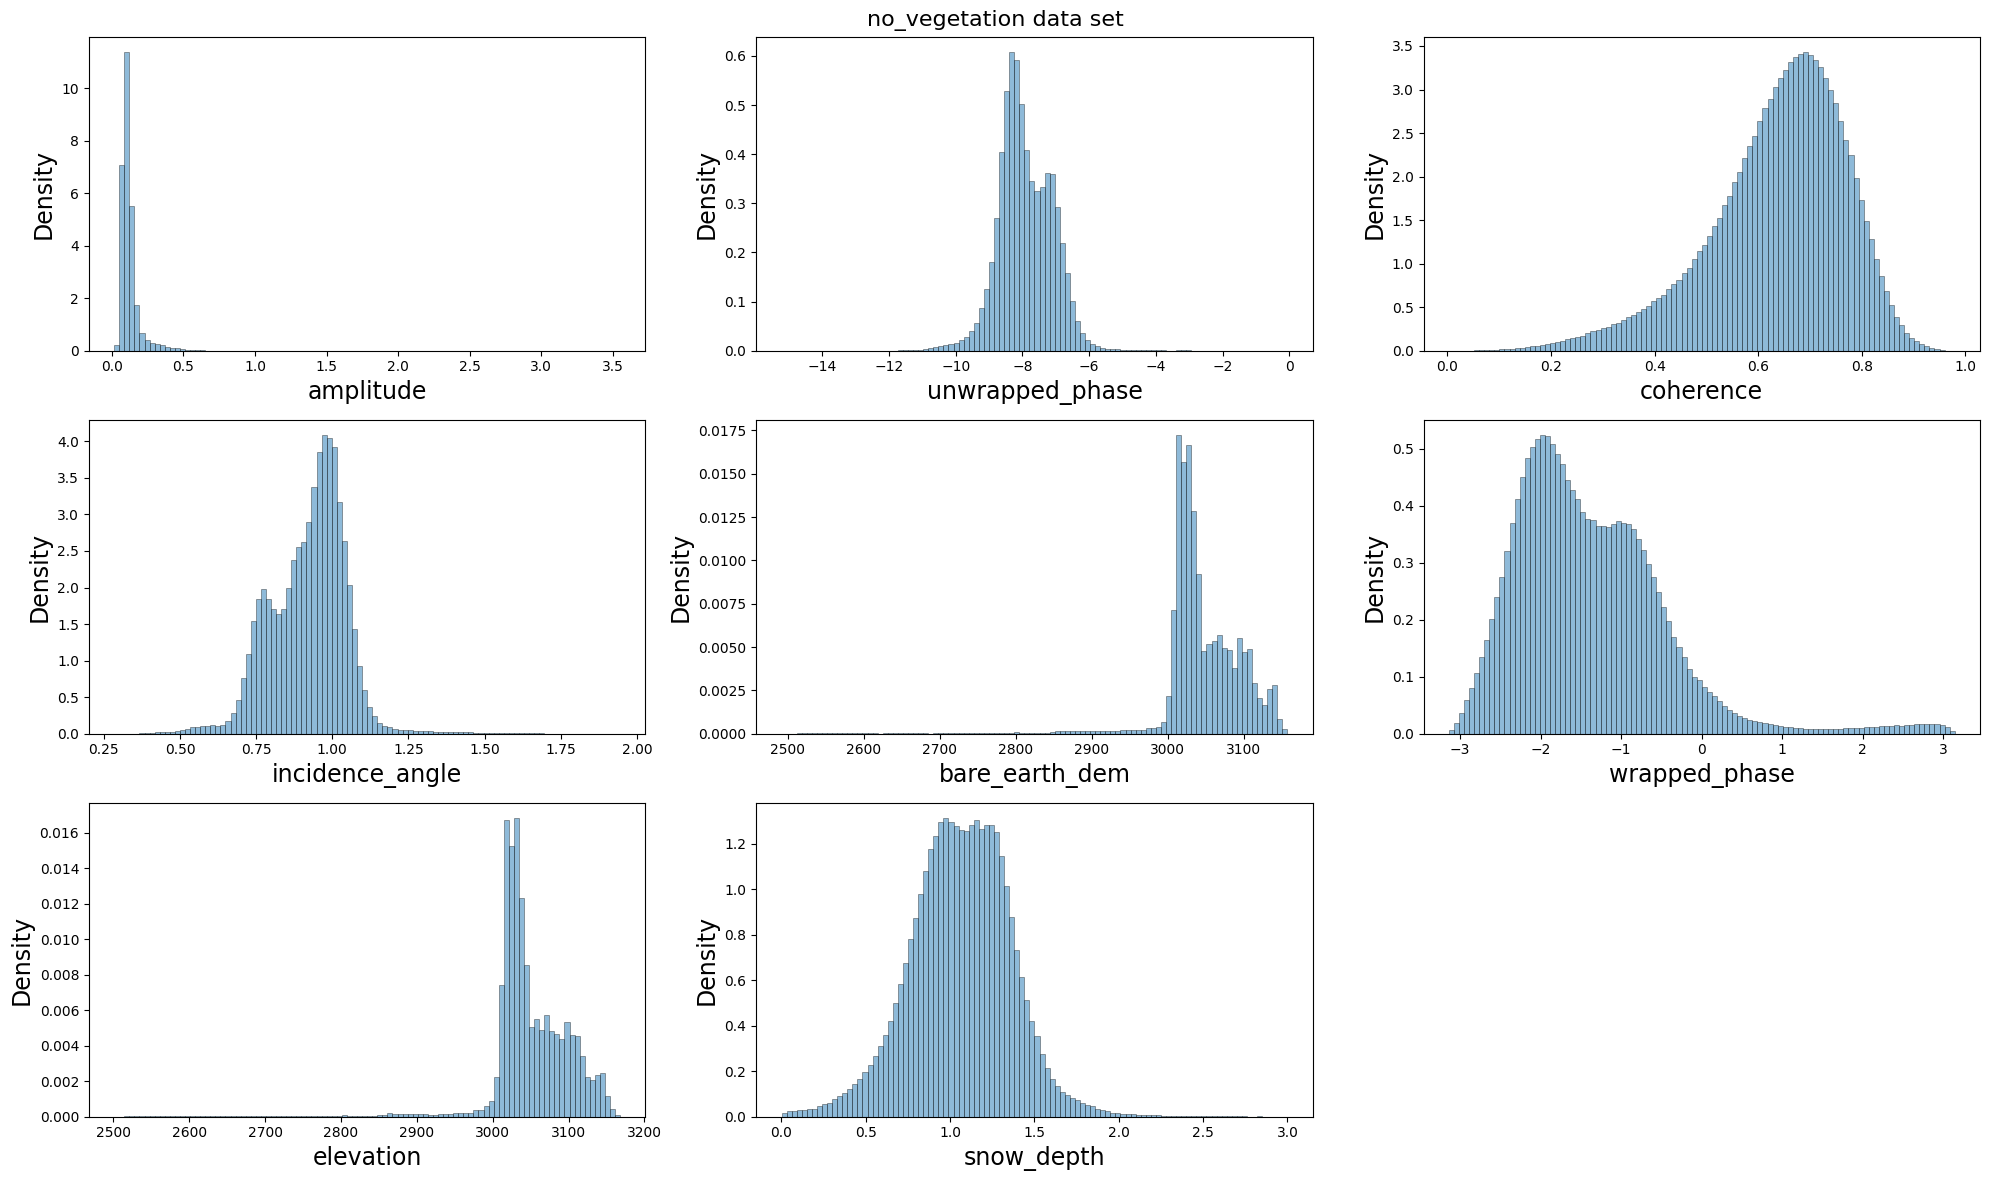

In [10]:
for key, value in mappings.items():
    plt.figure(figsize=(20,12))
    combined_df = value['X_train'].drop(columns=['idx', 'northing', 'easting']).assign(snow_depth=value['y_train'])
    plt.suptitle(f'{key} data set', fontsize=16)
    for i, col in enumerate(combined_df.columns):
        plt.subplot(3, 3, i+1)
        plt.hist(combined_df[col], bins=100, alpha=0.5, density=True, edgecolor='black', linewidth=0.5)
        plt.xlabel(col, fontsize=17)
        plt.ylabel('Density', fontsize=17)
    plt.tight_layout()
    plt.savefig(f'../plots/{key}_histograms.png', dpi=300)

### Pickle Splits for Later Use

In [11]:
with open('../data/full_splits.pkl', 'wb') as f:
    pickle.dump(full_splits, f)

with open('../data/vegetation_splits.pkl', 'wb') as f:
    pickle.dump(vegetation_splits, f)

with open('../data/no_vegetation_splits.pkl', 'wb') as f:
    pickle.dump(no_vegetation_splits, f)